## Dataset loading and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IBM-HR-Employee-Attrition-dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

If we dig into numerical data we will find out some interesting information.

1. Column 'EmployeeCount' is all 1s which indicate every observation is linked with 1 employee only, thanks for this info and we will drop it.
2. Column 'StandardHours' is all 80s which means everyone in this dataset works as a fulltime employee and we could definitely drop it as well.
3. Column 'Over18' is another interesting column which tells us every employee in this dataset is over 18 and we will drop it as well.

In [4]:
df = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [5]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
# print(cat)
# print(num)

## Visualisation
The visualisation of the data is done using the *Matplotlib* and *Seaborn* library. I have made plots like:
- Bar plots of the data
- Scatter plots of the data
- Donut graphs of the data
- Strip graphs of the data
- Box plots of the data
- Heat map of the data
- Correlation plot of the data

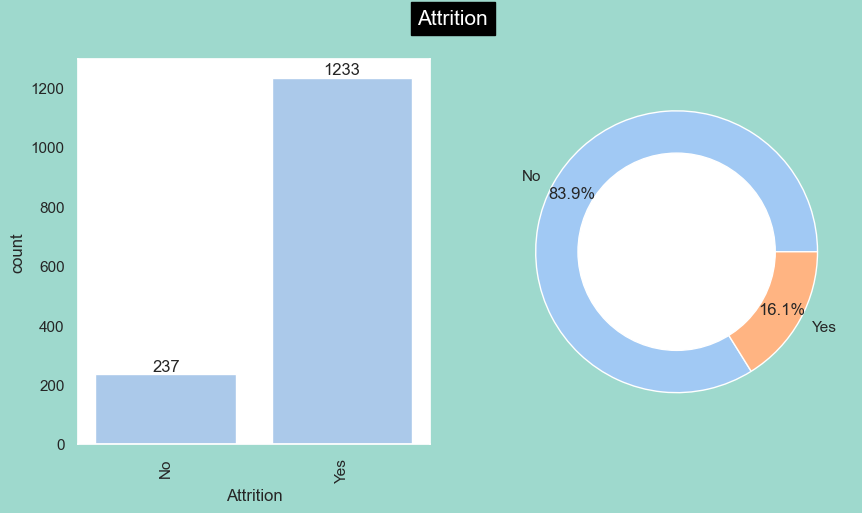

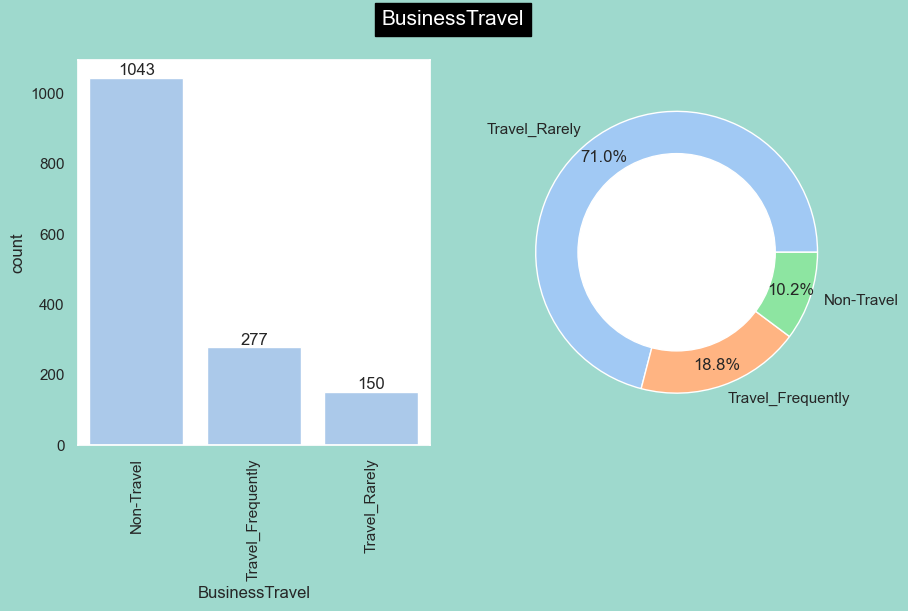

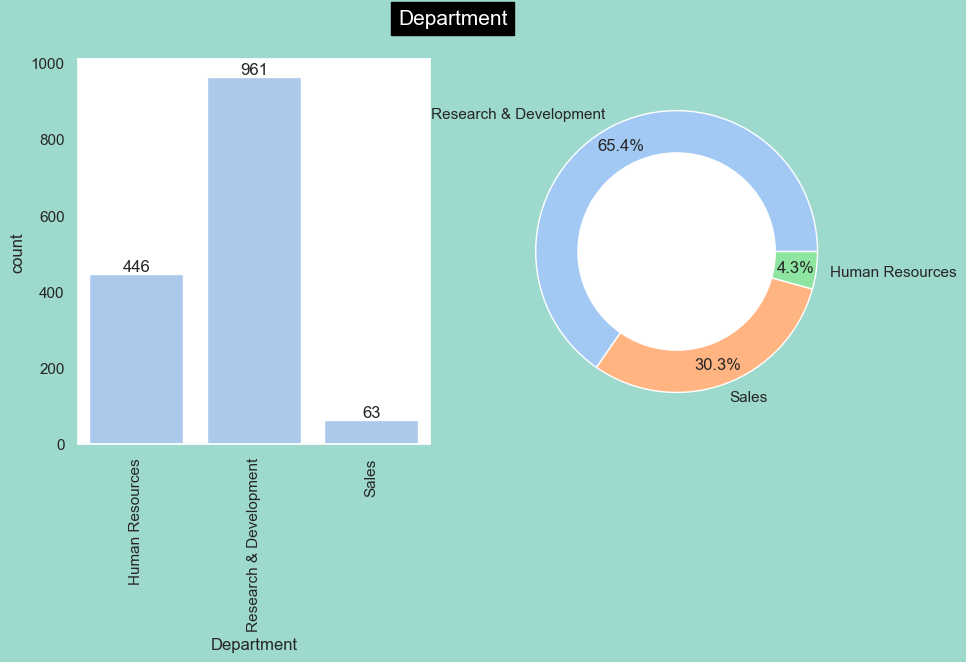

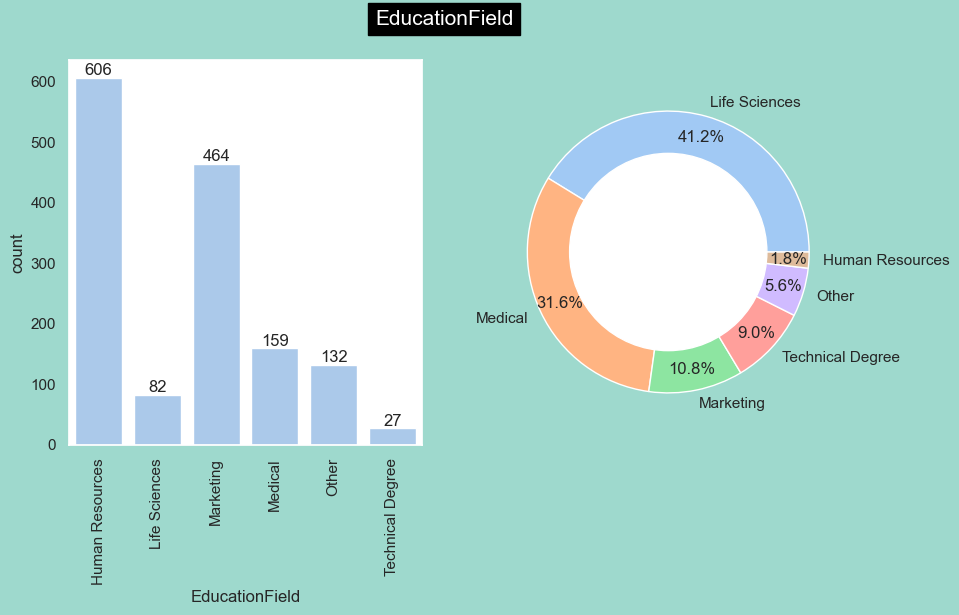

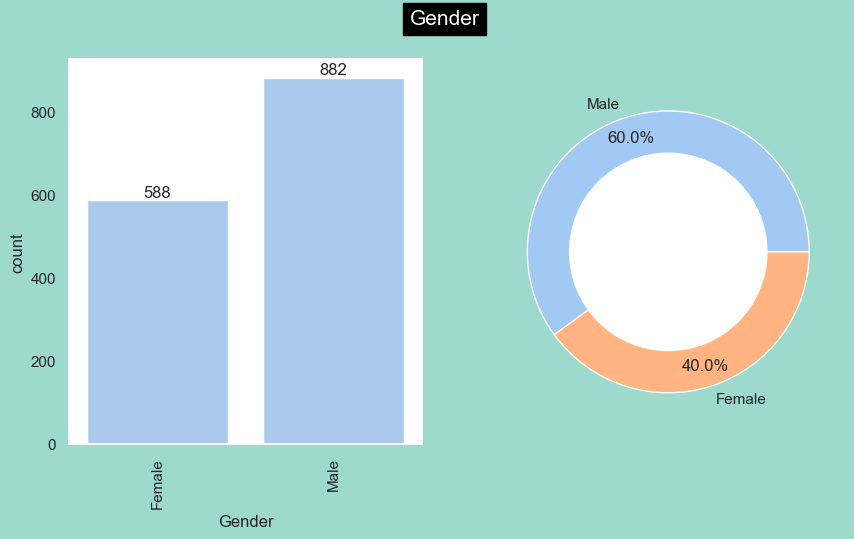

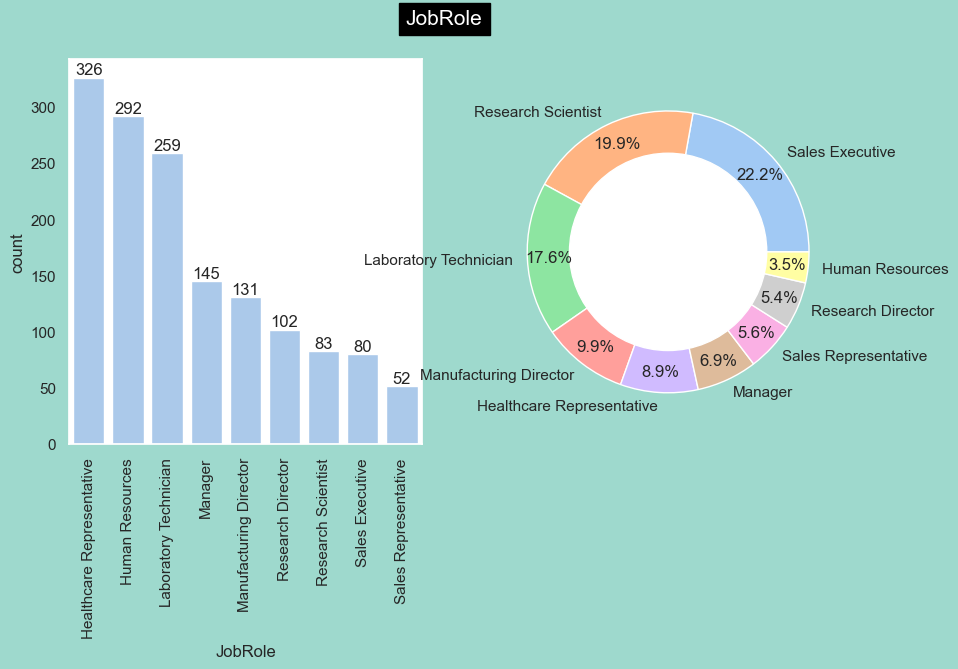

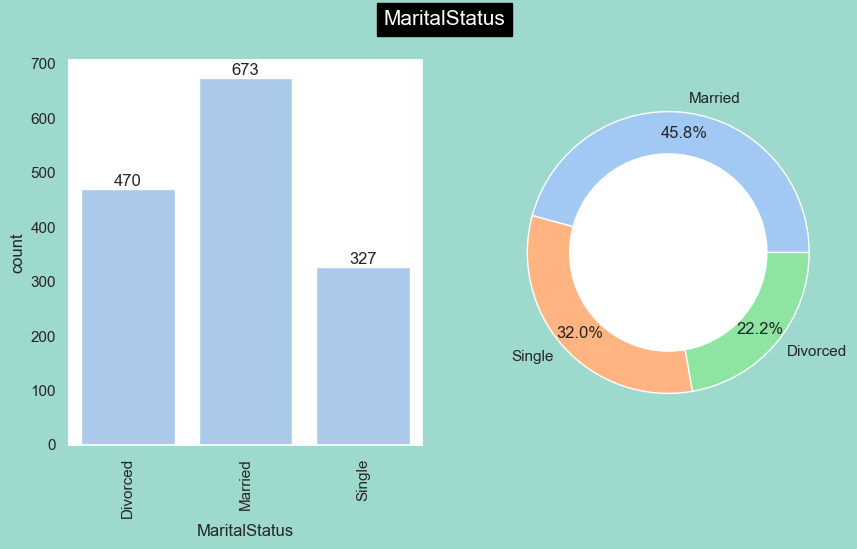

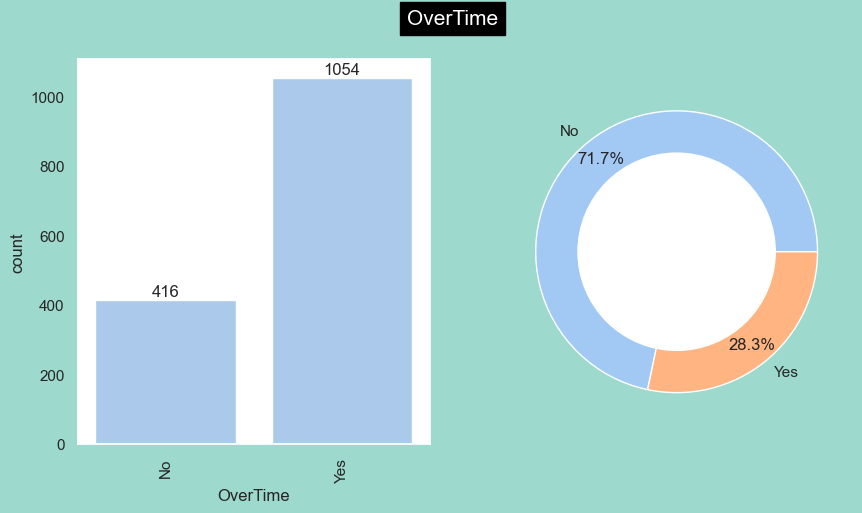

In [6]:
sns.set_theme(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("pastel")
for i, col in enumerate(cat):

    fig, axes = plt.subplots(1,2,figsize=(10,5))

    # count of col (countplot)
    
    ax=sns.countplot(data=df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)
        
    #count of col (pie chart)
    
    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)

    # Inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)

    plt.show()

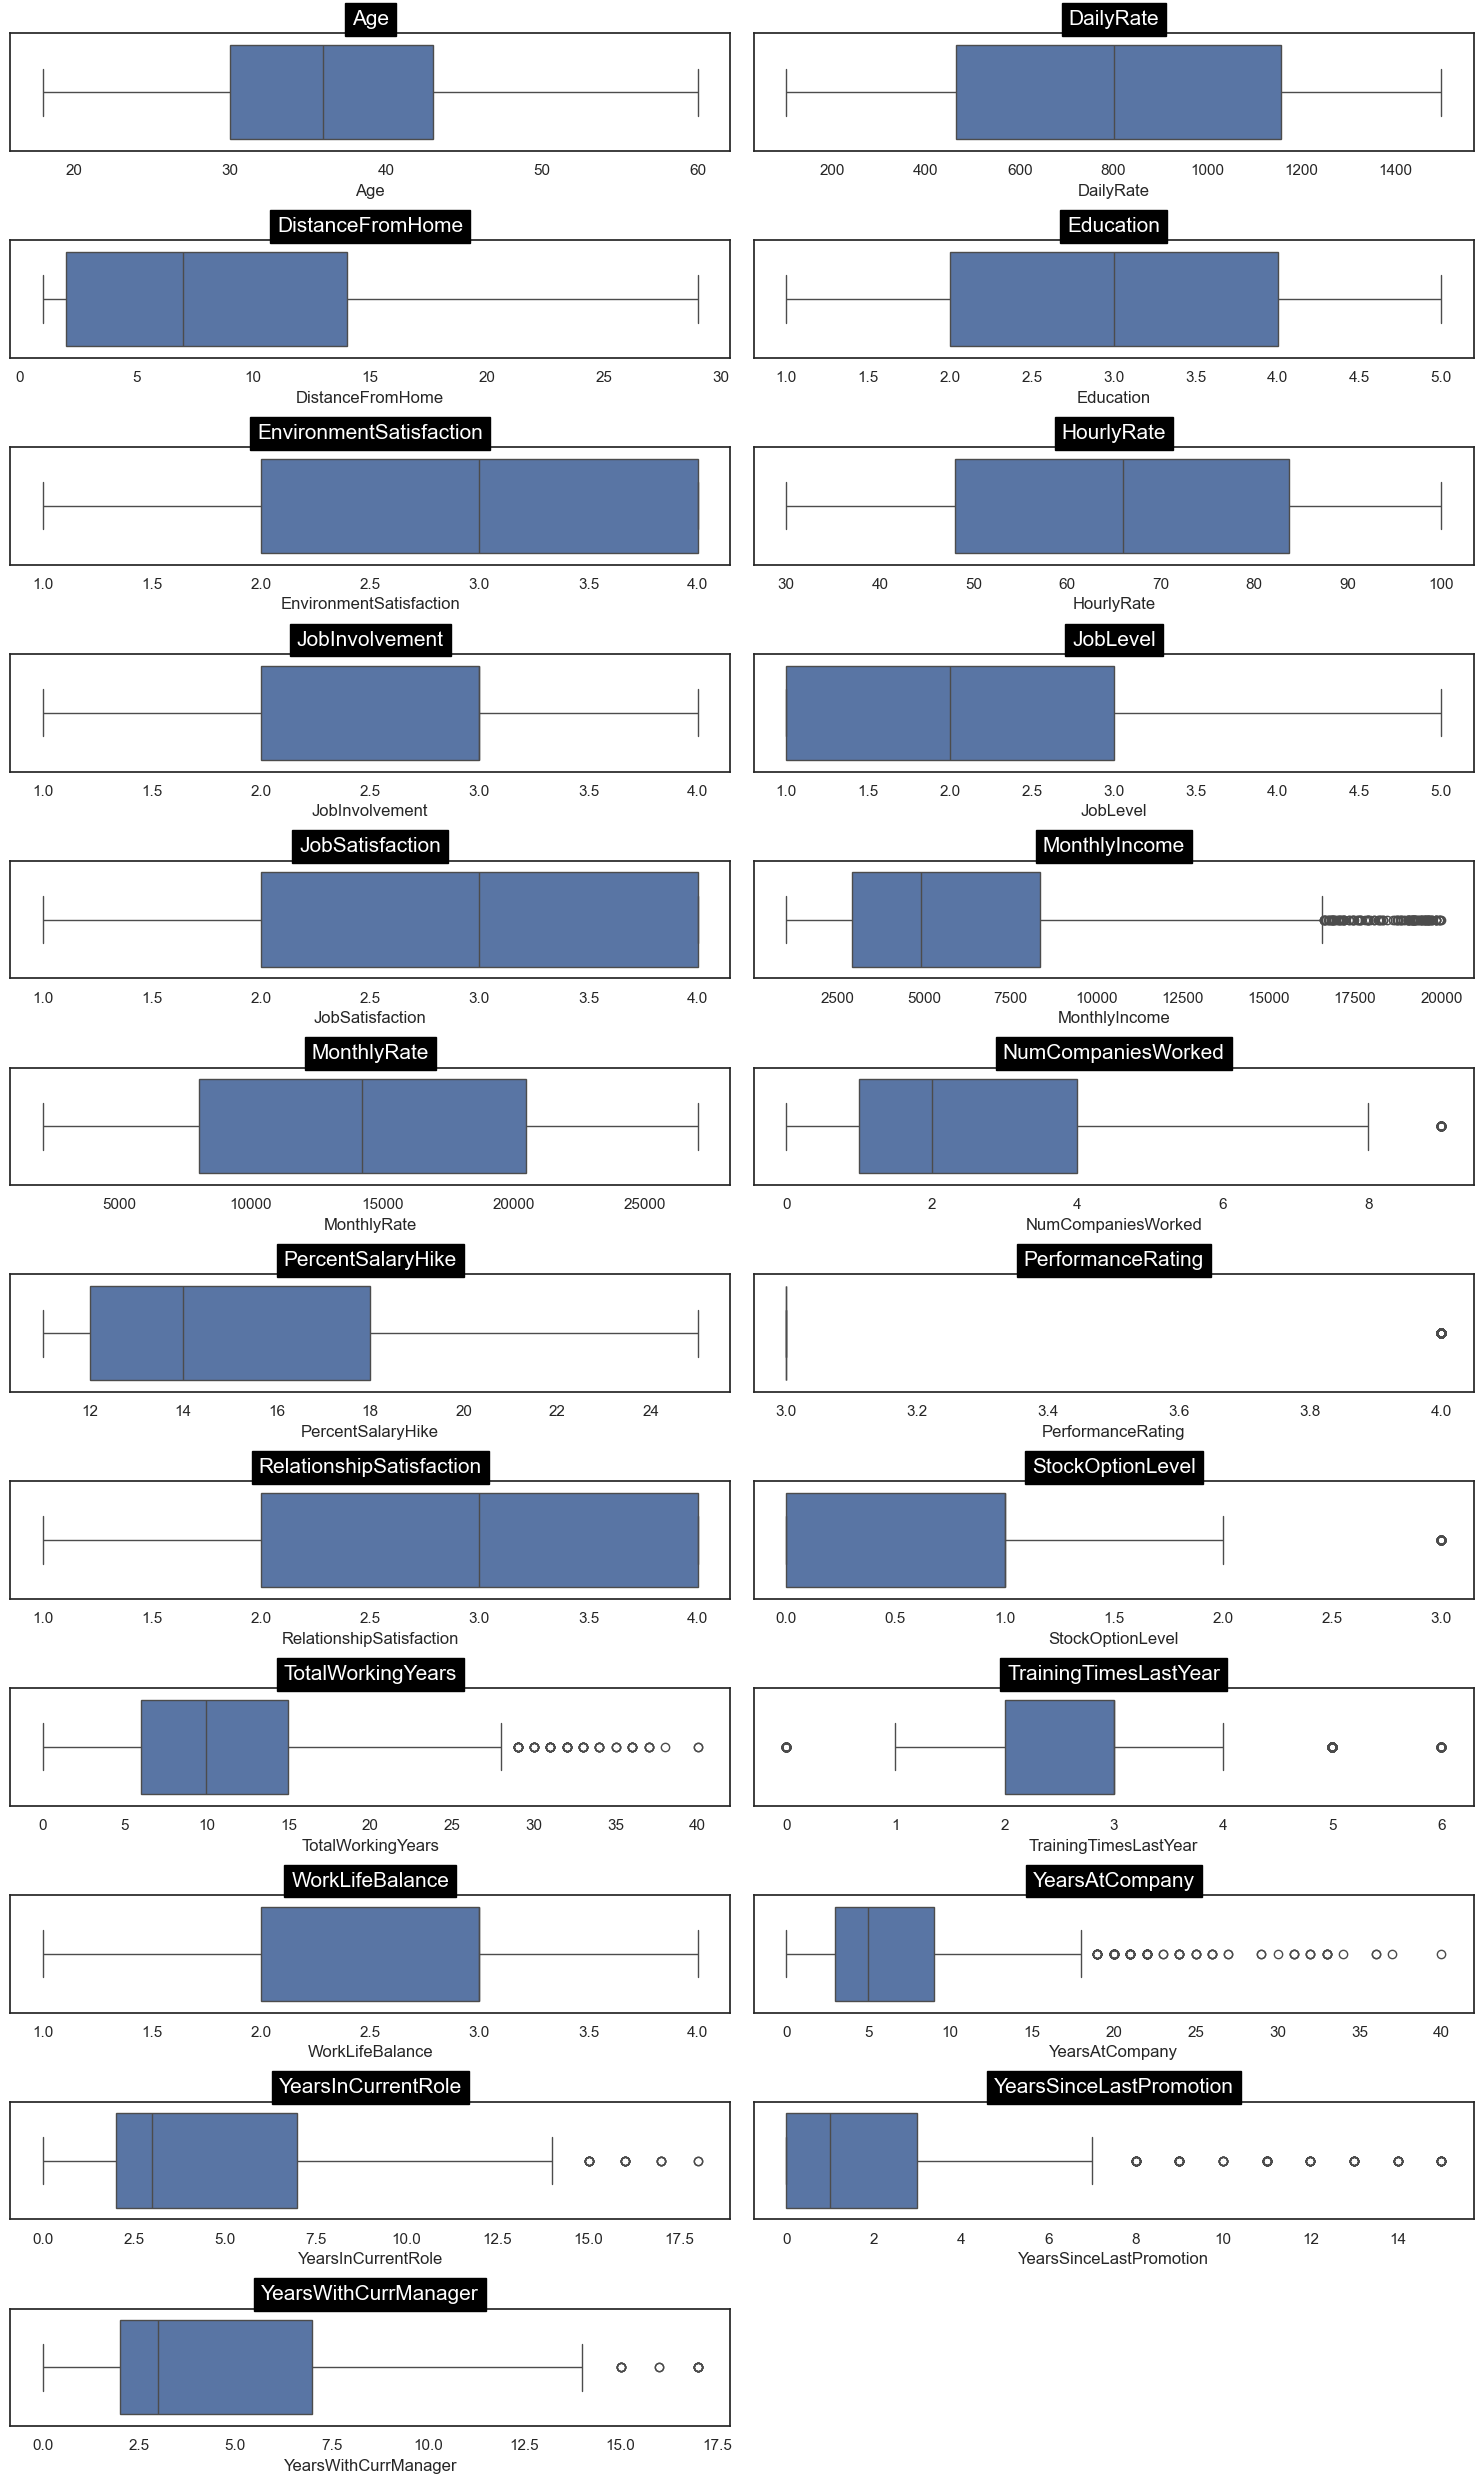

In [43]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

<Figure size 500x1000 with 0 Axes>

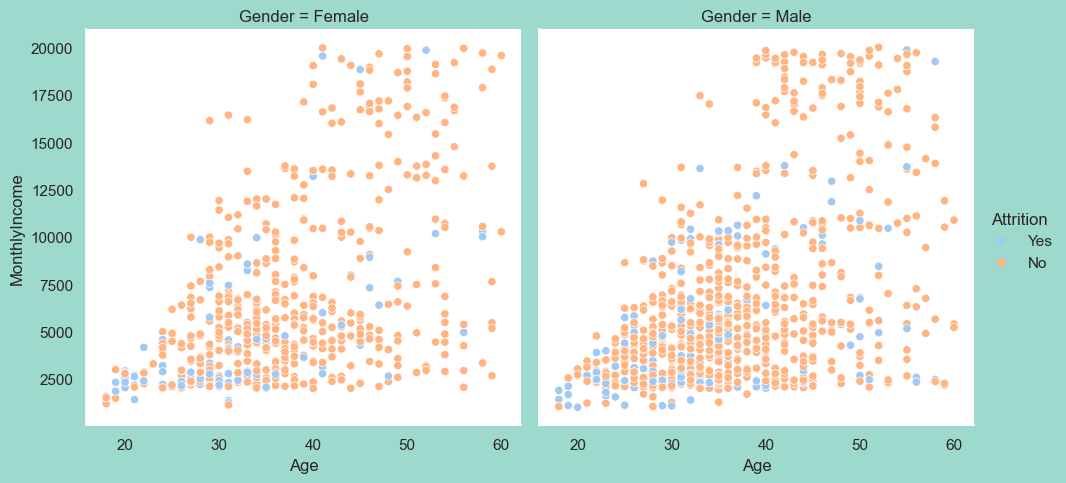

In [8]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

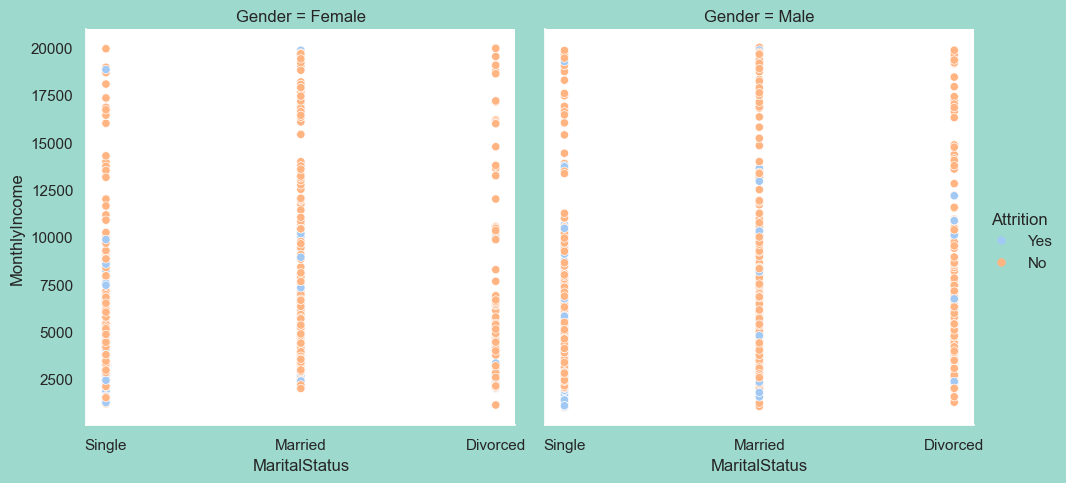

In [9]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

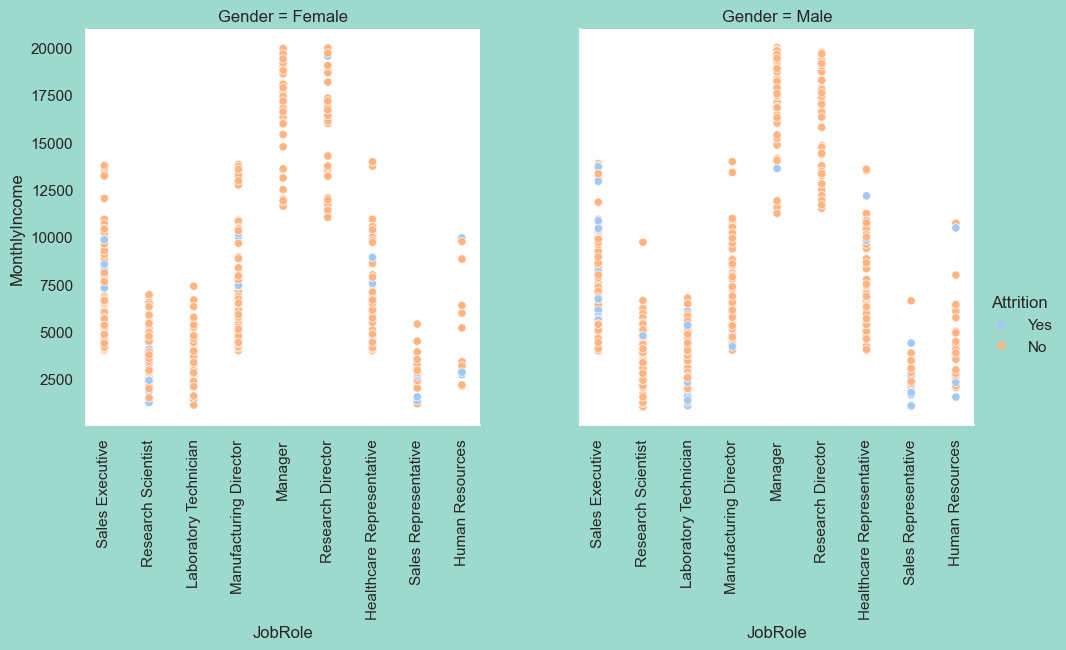

In [10]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

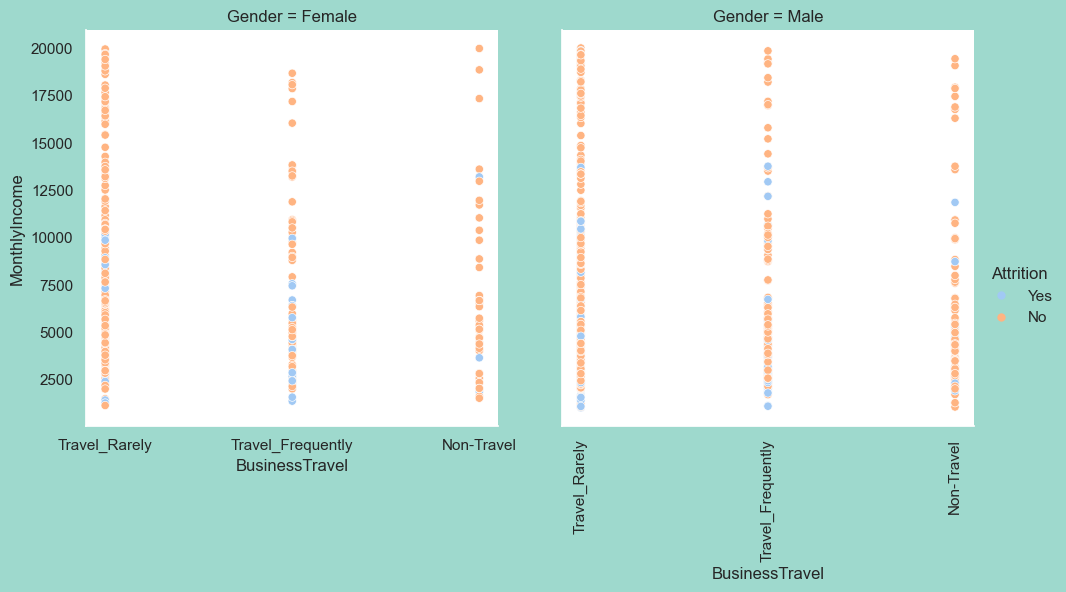

In [11]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

### 💡 Analysis of graphs
- **Age and Attrition:**
  - Attrition is highest for both men and women between **18 and 35 years of age**, gradually decreasing afterward.
- **Income and Attrition:**
  - As **income increases**, attrition decreases.
- **Marital Status and Attrition:**
  - Attrition is **much lower** for divorced women.
- **Travel Frequency and Attrition:**
  - Employees who **travel frequently** have higher attrition rates, especially among women.
- **Job Level and Attrition:**
  - Attrition is highest for employees in **level 1 jobs**.
- **Specific Job Positions and Attrition:**
  - Women in positions such as **manager, research director, and laboratory technician** experience almost no attrition.
  - Men in the **sales expert** position have a significant attrition rate.


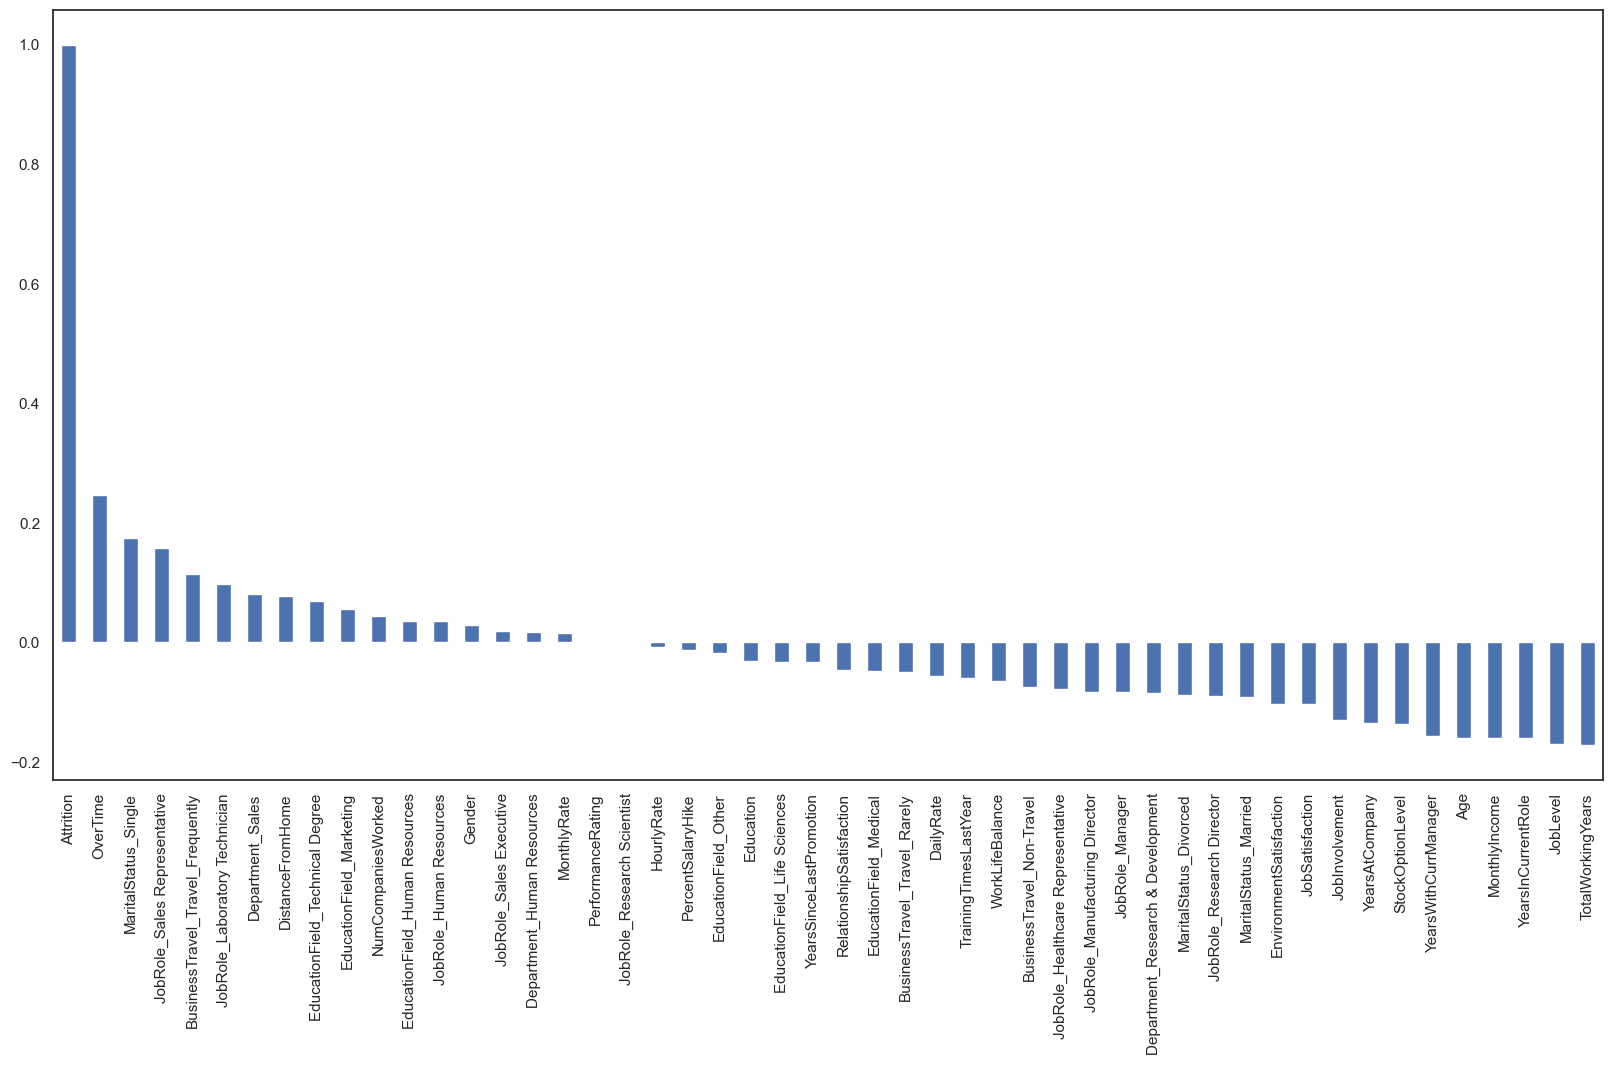

In [44]:
df_copy = df.copy()
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])
plt.figure(figsize=(20,10))
correlations=df_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar')
plt.savefig('FeatureCorr.png')

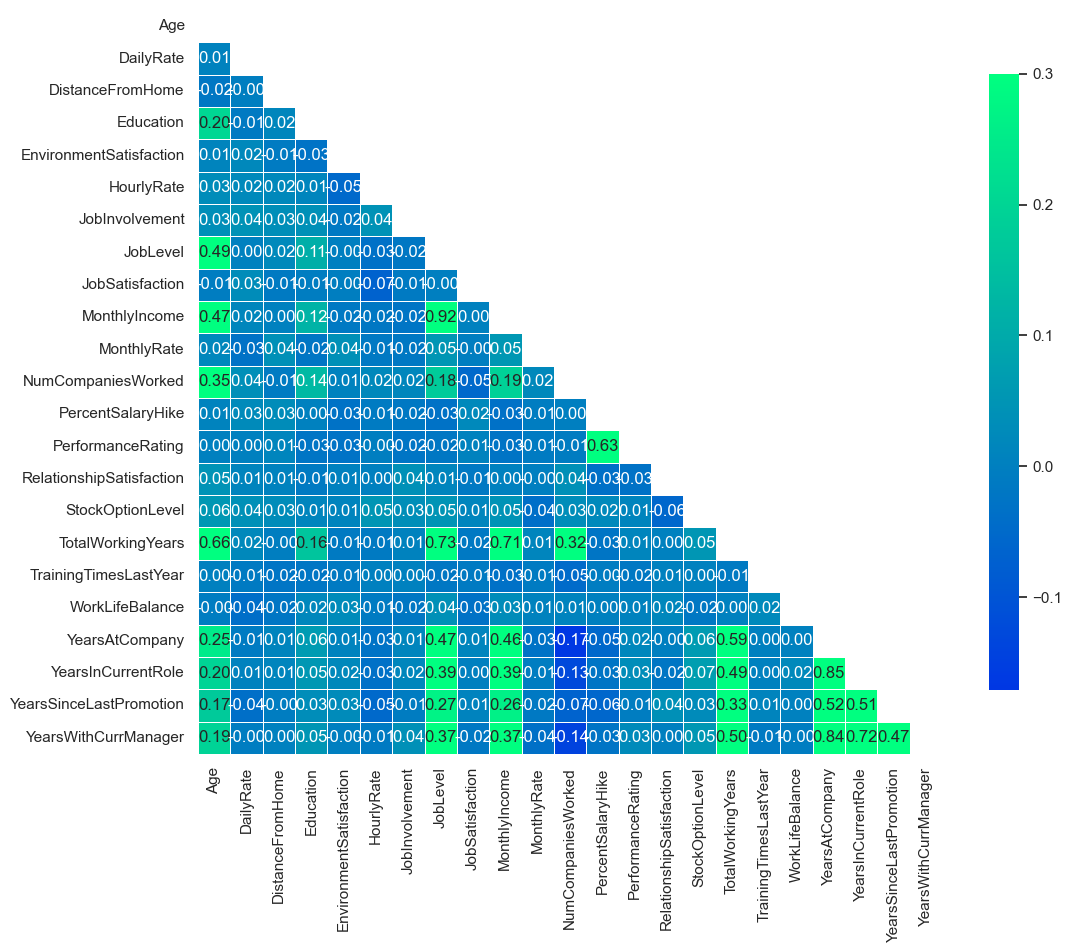

In [13]:
df2 = df.select_dtypes('int64')
df2_copy = df2.copy()

corr = df2_copy.corr(method = "spearman")
sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

- **High Correlations:**
  - **Monthly Income** and **Job Level**
  - **Year in Current Role**, **Year at Company**, and **Year with Current Manager** with **Year in Current Role**


-----------------------------------------------------------------------------------------------------------------------------------
We see a greate imbalance in the attrition label of the data. 
Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

To solve this we use oversampling. In this case we will use **SMOTE(synthetic minority oversampling technique)**

In [14]:
DF = df.copy()
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)


In [15]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)
#normalizing 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [16]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=60)
X, Y = oversampler.fit_resample(X,Y)
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 42)

## MODEL SELECTION
This part is the naive approach before hyperparameter tuning.

In [17]:
# build different machine learning models with the same random state if applicable
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score

lr = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
mlp = MLPClassifier(random_state = 42)
xg = xgb.XGBClassifier(random_state = 42)

In [18]:
# naive approach on each models without hyperparameter tuning
model_list = [lr,knn,rf,dt,mlp,xg]
score_res = []
for model in model_list:
    draft = model_selection.cross_val_score(model, x_train, y_train, cv = 5)
    score_res.append(draft)

In [19]:
# print out naive approach performance
model_names = ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree','Neural Network','XG Boost']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print('='*60)
print('The Score is listed below \n\n',df_accuracy)
print('='*60)

The Score is listed below 

       Logistic Regression    KNN  Random Forest  Decision Tree  \
cv_1                0.782  0.808          0.954          0.841   
cv_2                0.838  0.805          0.924          0.856   
cv_3                0.787  0.817          0.944          0.815   
cv_4                0.779  0.779          0.898          0.871   
cv_5                0.774  0.802          0.931          0.820   

      Neural Network  XG Boost  
cv_1           0.856     0.927  
cv_2           0.861     0.919  
cv_3           0.883     0.942  
cv_4           0.850     0.924  
cv_5           0.845     0.919  


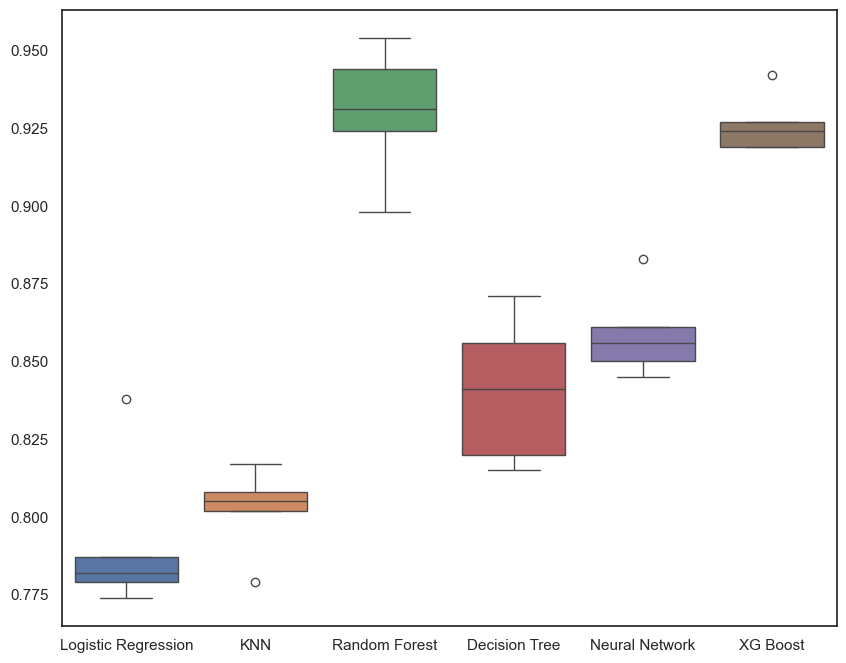

In [20]:
# visualize the performance of different machine learning models
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_accuracy)
plt.savefig('draft.png')

**Logistic Regression** isnt doing that well here

----------------------------------------------------------------------------------------------------------------------------------
## Hyperparameter tuning to achieve higher scores

In [21]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)
# set kfold number for k fold cross validation method
kfold = model_selection.KFold(n_splits=10)

In [22]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}
# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

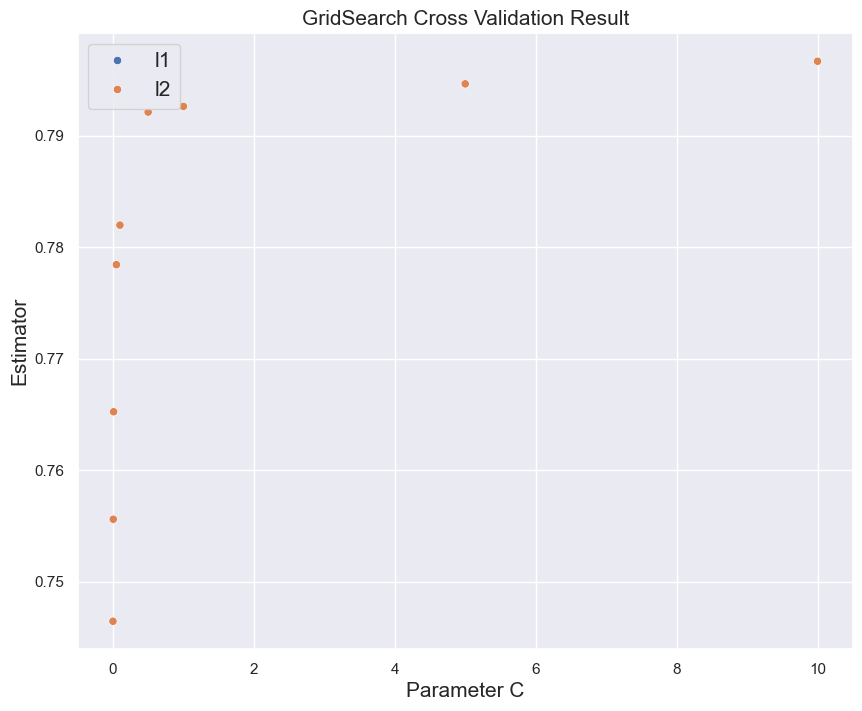

In [23]:
lr_res = grid_lr.cv_results_
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_C', y = 'mean_test_score',hue = 'param_penalty',data = lr_res)
plt.xlabel('Parameter C',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig('LR.png')

In [24]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_lr)
best_lr_model = grid_lr.best_estimator_
# append the best model to the list for other evalution
best_models.append(('Logistic Regression', best_lr_model))

Best Score: 0.797
Best Parameters:
C : 10
penalty : l2


In [25]:
# hyperparameter tuning for K nearest neighbors
knn_params = {
    'n_neighbors':[3,5,7,9,11,13,15,17,21,31,59,61,63] 
}
# apply grid search on each hyperparameter and fit in with data
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63]})

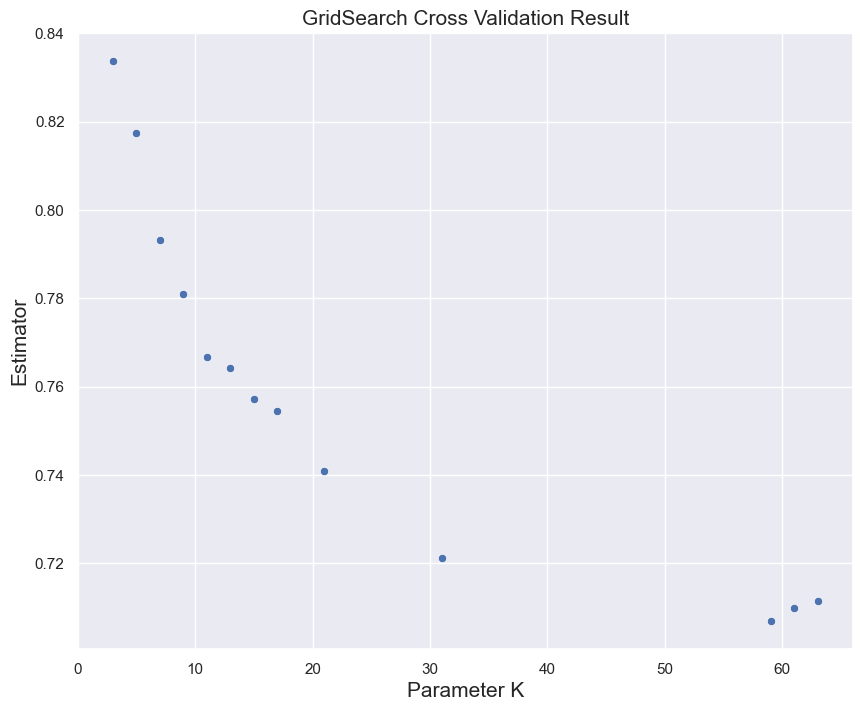

In [26]:
knn_res = grid_knn.cv_results_
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_n_neighbors', y = 'mean_test_score',data = knn_res)
plt.xlabel('Parameter K',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.savefig('knn.png')

In [27]:
get_grid_res(grid_knn)
best_knn_model = grid_knn.best_estimator_
# append the best model to the list for other evalution
best_models.append(('K Nearest Neighbors',best_knn_model))

Best Score: 0.834
Best Parameters:
n_neighbors : 3


In [28]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80,100],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15, 20],
    'max_features': ['sqrt', 'auto','log2']
}
grid_rf = GridSearchCV(rf,params_rf, cv=kfold)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80, 100]})

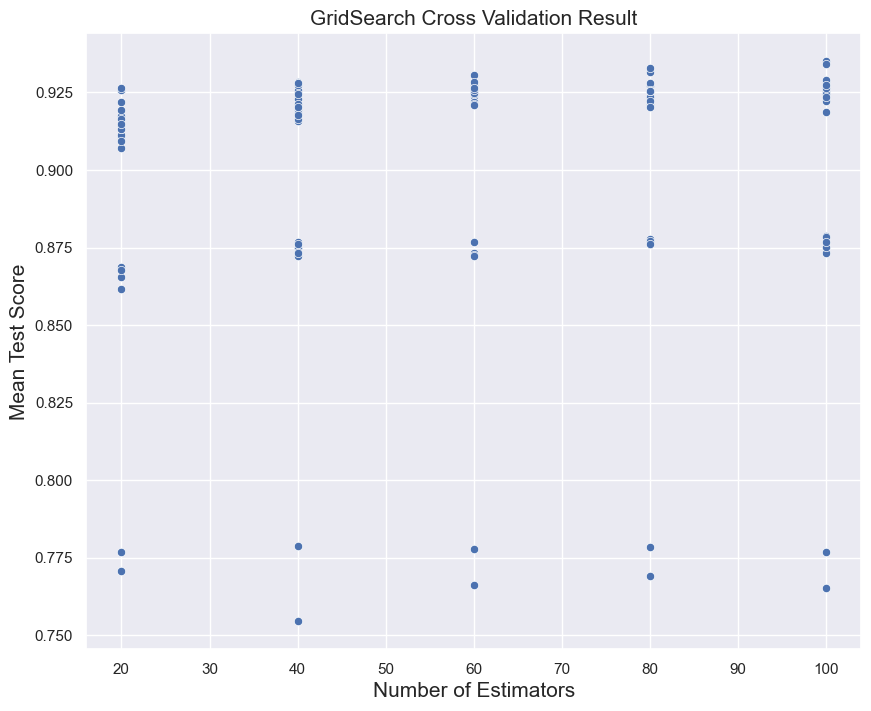

In [29]:
# visualize the affect of different hyperparameters on performance
rf_res = grid_rf.cv_results_
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='param_n_estimators', y='mean_test_score', data=rf_res)
plt.xlabel('Number of Estimators', fontsize=15)
plt.ylabel('Mean Test Score', fontsize=15)
plt.title('GridSearch Cross Validation Result', fontsize=15)
plt.savefig('rf.png')

In [30]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_rf)
best_rf_model = grid_rf.best_estimator_
# append the best model to the list for other evalution
best_models.append(('Random Forest', best_rf_model))

Best Score: 0.935
Best Parameters:
max_depth : 15
max_features : log2
min_samples_split : 4
n_estimators : 100


In [31]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,15],
    'min_samples_split':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt,params_dt, cv=kfold)
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

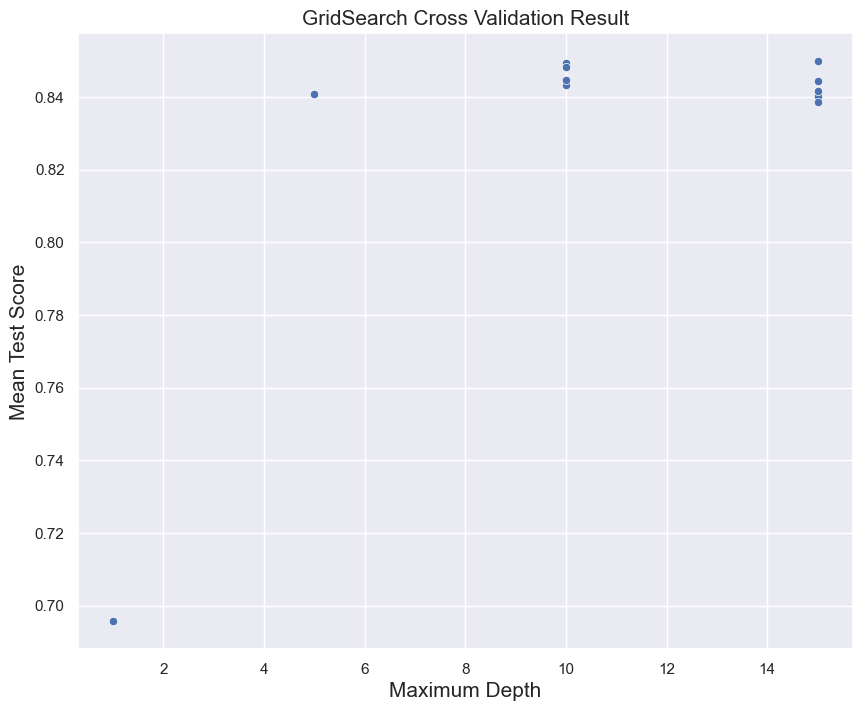

In [32]:
dt_res = grid_dt.cv_results_
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='param_max_depth', y='mean_test_score', data=dt_res)
plt.xlabel('Maximum Depth', fontsize=15)
plt.ylabel('Mean Test Score', fontsize=15)
plt.title('GridSearch Cross Validation Result', fontsize=15)
plt.savefig('dt.png')

In [33]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_dt)
best_dt_model = grid_dt.best_estimator_
# append the best model to the list for other evalution
best_models.append(('Decision Tree', best_dt_model))

Best Score: 0.850
Best Parameters:
max_depth : 15
min_samples_split : 2


In [34]:
# hyperparameter tuning for multi layer perceptrons
params_mlp = {
    'hidden_layer_sizes': [(10,),(20,),(30,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}
grid_mlp = GridSearchCV(mlp,params_mlp, cv = kfold)
grid_mlp.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

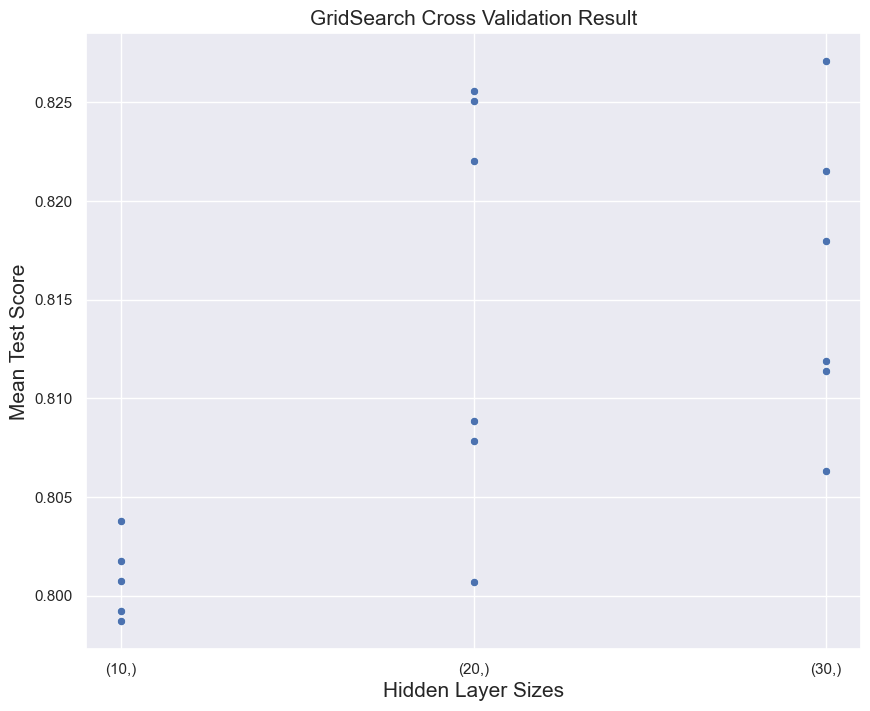

In [35]:
mlp_res = grid_mlp.cv_results_
# Convert the values in 'param_hidden_layer_sizes' to strings
param_hidden_layer_sizes_str = [str(value) for value in mlp_res['param_hidden_layer_sizes']]
# Create a DataFrame from the dictionary
mlp_res_df = pd.DataFrame({
    'param_hidden_layer_sizes_str': param_hidden_layer_sizes_str,
    'mean_test_score': mlp_res['mean_test_score']
})
# Visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='param_hidden_layer_sizes_str', y='mean_test_score', data=mlp_res_df)
plt.xlabel('Hidden Layer Sizes', fontsize=15)
plt.ylabel('Mean Test Score', fontsize=15)
plt.title('GridSearch Cross Validation Result', fontsize=15)
plt.savefig('mlp.png')

In [36]:
get_grid_res(grid_mlp)
best_mlp_model = grid_mlp.best_estimator_
# append the best model to the list for other evalution
best_models.append(('Neural Network', best_mlp_model))

Best Score: 0.827
Best Parameters:
activation : relu
alpha : 0.1
hidden_layer_sizes : (30,)


In [37]:
# hyperparameter tuning for extreme boosting tree aka xgboost
params_xgb = {
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [1,5,10,15],
        'n_estimators':[40,60,80],
        'reg_alpha':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'reg_lambda':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'eta':[0.4,0.6,0.8],
        'learning_rate':[0.1, 0.3, 0.5]
        }
from sklearn.model_selection import RandomizedSearchCV
grid_xgb = RandomizedSearchCV(xg, params_xgb,cv = kfold,n_iter = 50)
grid_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_typ...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50,
                   param_distributions={'eta': [0.4, 0.6, 0.8],
                                        'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [1, 5, 10, 15],
                                        'n_estimators': [40, 60, 80],
                                        'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1,
                                                      5],
                                        'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1,
                                                       5],
                                        'subsample': [0.4, 0.6, 0.8]})

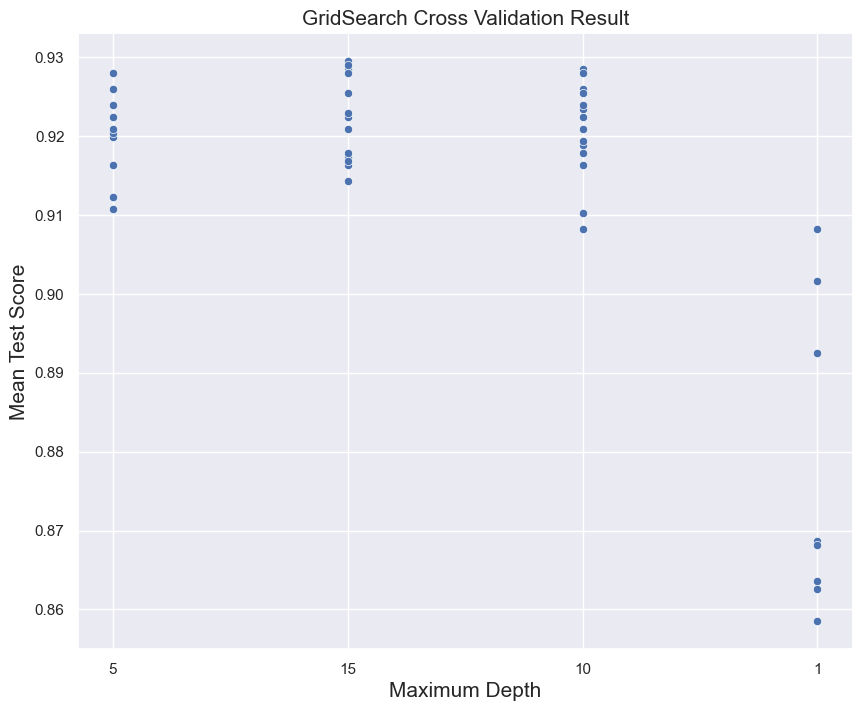

In [38]:
xgb_res = grid_xgb.cv_results_
# Convert the values in 'param_max_depth' to strings
param_max_depth_str = [str(value) for value in xgb_res['param_max_depth']]

# Create a DataFrame from the dictionary
xgb_res_df = pd.DataFrame({
    'param_max_depth_str': param_max_depth_str,
    'mean_test_score': xgb_res['mean_test_score']
})

# Visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='param_max_depth_str', y='mean_test_score', data=xgb_res_df)
plt.xlabel('Maximum Depth', fontsize=15)
plt.ylabel('Mean Test Score', fontsize=15)
plt.title('GridSearch Cross Validation Result', fontsize=15)
plt.savefig('xgb.png')

In [39]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_xgb)
best_xgb_model = grid_xgb.best_estimator_
# append the best model to the list for other evalution
best_models.append(('Extreme Boosting Tree', best_xgb_model))

Best Score: 0.930
Best Parameters:
subsample : 0.6
reg_lambda : 0.01
reg_alpha : 0.01
n_estimators : 60
max_depth : 15
learning_rate : 0.3
eta : 0.8


In [40]:
# print out the list of optimized models
for name,model in best_models:
    print(name)


Logistic Regression
K Nearest Neighbors
Random Forest
Decision Tree
Neural Network
Extreme Boosting Tree


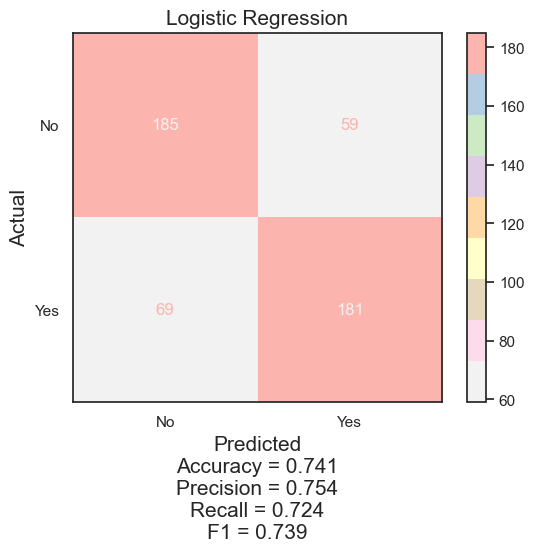

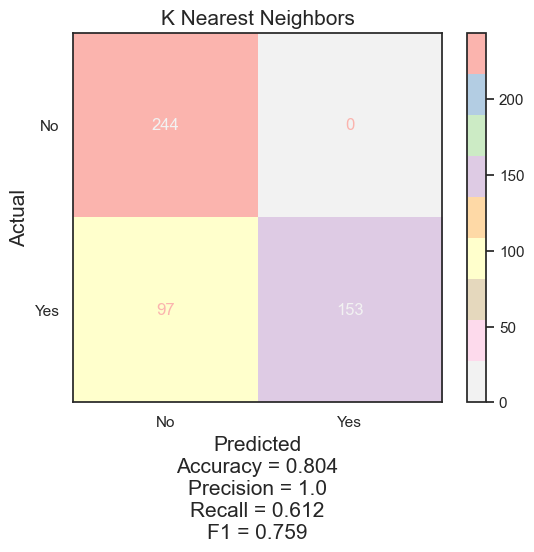

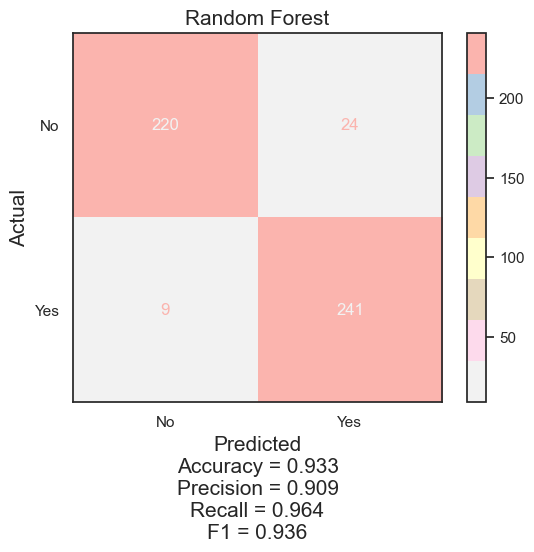

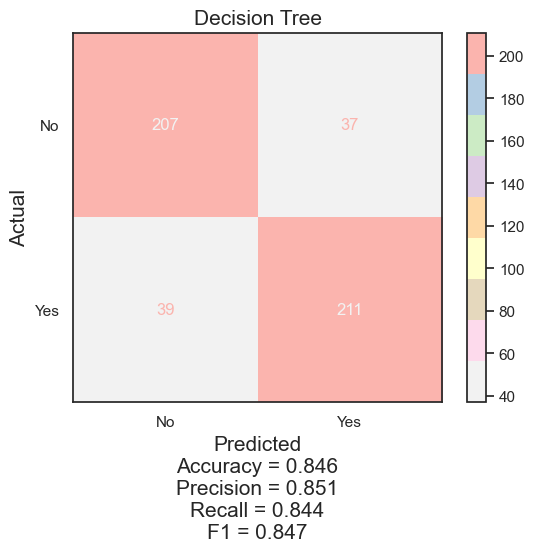

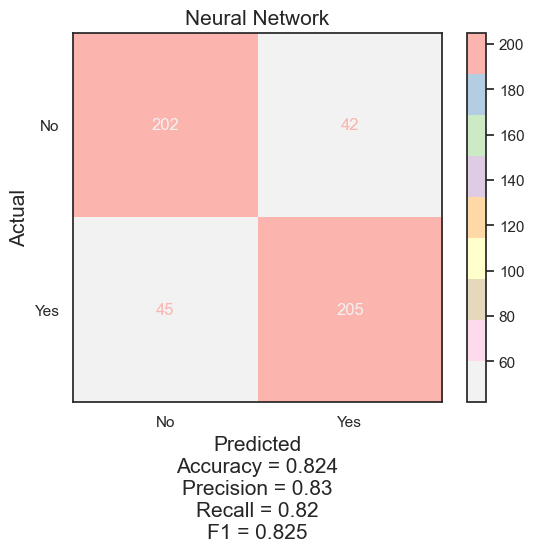

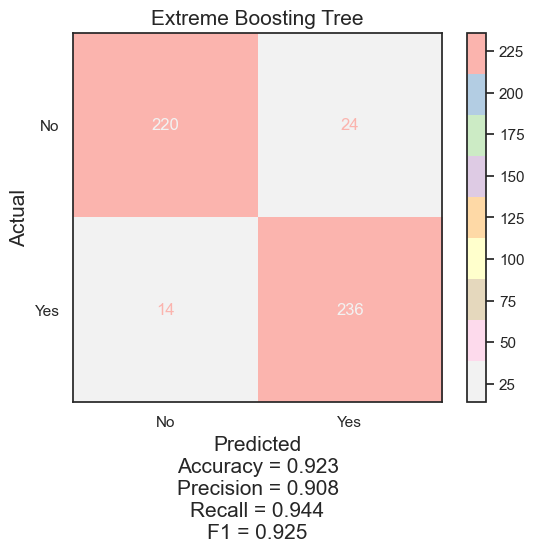

In [41]:
# helper function to print out and visualize the evaluation result of each model including
# confusion matrix, precison-recall and f1 score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_cm(models):
    sns.set_style('white')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test, model.predict(x_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=class_names)
        disp.plot(cmap="Pastel1_r")
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecall = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)
        plt.savefig(f'{model_name}.png')

plot_cm(best_models)

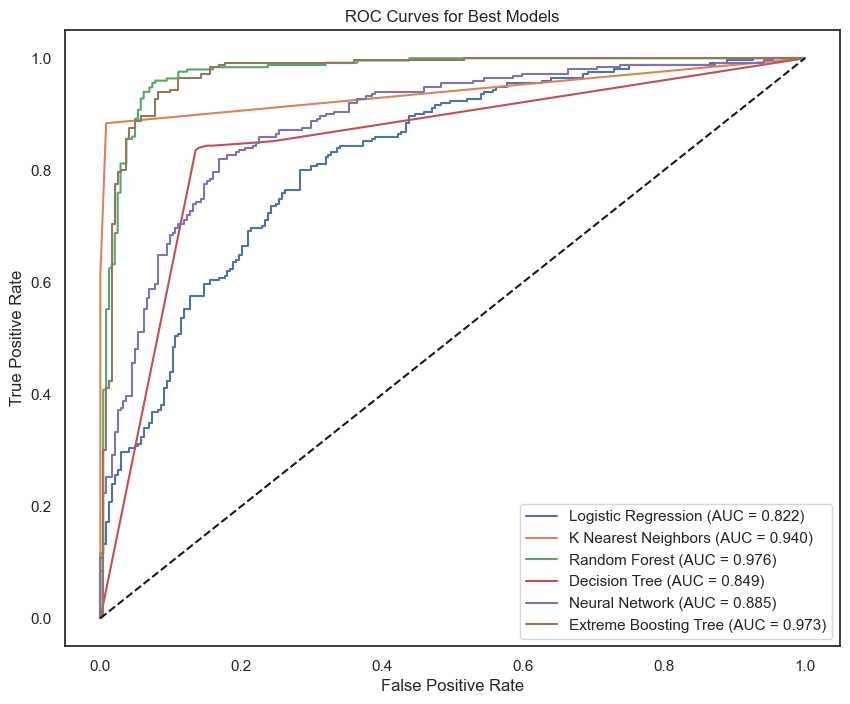

In [42]:
from sklearn.metrics import roc_curve, auc

# Create a figure and axis for the ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over the best models
for model_name, model in best_models:
    # Make predictions on the test data
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculate the AUC score
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve and label it
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Add labels, title, and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Best Models')
ax.legend(loc='lower right')

# Adjust the plot limits
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

# Add a diagonal line representing random guessing
ax.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.savefig('roc_auc_score.png')
# Show the plot
plt.show()


## Conclusion:

The employee attrition analysis on the IBM HR analytics dataset successfully developed a high-performing binary classification model leveraging the Random Forest algorithm. After addressing the significant class imbalance through SMOTE oversampling, a rigorous model evaluation process involving cross-validation and hyperparameter tuning was conducted across multiple machine learning classifiers. The Random Forest model emerged superior, achieving an accuracy of 93.3%, recall of 96.4%, F1-score of 93.6%, and precision of 90.9%. This robust model demonstrates exceptional capability in accurately identifying attrition cases while maintaining a desirable balance between precision and recall. It also has a very high AUC score of 97.6% so its predictions are very stable and non-biased. Its deployment can enable organizations to proactively mitigate employee turnover and optimize workforce management strategies through targeted retention initiatives. 